In [92]:
import matplotlib.pyplot as plt

import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import pandas as pd
pd.set_option('display.max_columns', None)
from tensorflow import keras
from tensorflow.keras.models import Sequential
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import *
from sklearn.model_selection import train_test_split 
from sklearn.utils import shuffle
from tensorflow.keras.callbacks import EarlyStopping

In [93]:
cutoff = False
cutoff_threshold = 1
remove_zero = True

Load Data

In [94]:
df_test = pd.read_csv("PreparedData/test.csv")
df_train = pd.read_csv("PreparedData/train.csv")

One hot encode

In [95]:
# Feature Engineering (one hot encode)
df_train = pd.get_dummies(df_train,columns= ["location","field_edu"], drop_first=True)
df_train.head(5)

,user_id,moved_after_2019,companies_worked,max_duration,Business,Design,IT,Other,N_Skills,English,German,Turkish,French,Spanish,Chinese,NLanguages,start_date_edu,end_date_edu,degree_edu,location_Netherlands,location_Other,location_Turkey,location_United Kingdom,field_edu_Engineering,field_edu_Other,field_edu_Science
0,1301,1,4,1645,2,0,4,17,23,3,0,5,0,0,0,4,2100-01-01,2100-01-01,2,0,0,1,0,0,1,0
1,6950,0,4,1402,0,0,17,32,49,3,0,0,0,0,0,3,2100-01-01,2100-01-01,1,0,0,1,0,0,1,0
2,4880,0,4,1216,0,2,4,15,21,2,0,5,0,0,0,2,2100-01-01,2100-01-01,2,0,0,1,0,0,1,0
3,26046,0,1,1856,0,0,7,23,30,2,0,0,0,0,0,2,2100-01-01,2100-01-01,1,0,0,1,0,0,0,0
4,11005,0,3,2769,0,1,10,37,48,3,0,5,0,0,0,3,2100-01-01,2100-01-01,1,0,0,1,0,0,1,0


In [96]:
df_test = pd.get_dummies(df_test,columns= ["location","field_edu"], drop_first=True)
df_test.head(5)

,user_id,moved_after_2019,companies_worked,max_duration,Business,Design,IT,Other,N_Skills,English,German,Turkish,French,Spanish,Chinese,NLanguages,start_date_edu,end_date_edu,degree_edu,location_Netherlands,location_Other,location_Turkey,location_United Kingdom,field_edu_Engineering,field_edu_Other,field_edu_Science
0,17449,2,3,4017,1,0,11,22,34,2,0,4,0,0,0,2,2100-01-01,2100-01-01,1,0,0,1,0,1,0,0
1,33967,2,2,730,2,9,1,19,31,5,0,5,0,0,1,2,2100-01-01,2100-01-01,4,0,0,1,0,0,1,0
2,2110,2,2,0,3,0,2,8,13,2,1,5,0,0,0,4,2100-01-01,2100-01-01,2,0,0,1,0,0,1,0
3,55082,2,2,2011,0,0,12,25,37,2,0,2,0,0,0,1,2100-01-01,2100-01-01,1,0,0,1,0,0,0,0
4,37165,2,1,944,0,0,0,4,4,4,0,5,0,0,0,2,2100-01-01,2100-01-01,1,0,0,1,0,1,0,0


Drop some columns

In [97]:
df_train.drop(["start_date_edu","end_date_edu"], axis=1, inplace=True)
df_test.drop(["start_date_edu","end_date_edu"], axis=1, inplace=True)

In [98]:
df_train.head()

,user_id,moved_after_2019,companies_worked,max_duration,Business,Design,IT,Other,N_Skills,English,German,Turkish,French,Spanish,Chinese,NLanguages,degree_edu,location_Netherlands,location_Other,location_Turkey,location_United Kingdom,field_edu_Engineering,field_edu_Other,field_edu_Science
0,1301,1,4,1645,2,0,4,17,23,3,0,5,0,0,0,4,2,0,0,1,0,0,1,0
1,6950,0,4,1402,0,0,17,32,49,3,0,0,0,0,0,3,1,0,0,1,0,0,1,0
2,4880,0,4,1216,0,2,4,15,21,2,0,5,0,0,0,2,2,0,0,1,0,0,1,0
3,26046,0,1,1856,0,0,7,23,30,2,0,0,0,0,0,2,1,0,0,1,0,0,0,0
4,11005,0,3,2769,0,1,10,37,48,3,0,5,0,0,0,3,1,0,0,1,0,0,1,0


Standard scaling

In [99]:
from sklearn.preprocessing import StandardScaler

train_scale = df_train[['max_duration','Business', 'Design', 'IT', 'Other', 'N_Skills']]
test_scale  = df_test[['max_duration','Business', 'Design', 'IT', 'Other', 'N_Skills']]

scaler = StandardScaler()
scaler.fit(train_scale)
X_scaled = scaler.transform(train_scale)
df_train[['max_duration','Business', 'Design', 'IT', 'Other', 'N_Skills']] = X_scaled

scaler = StandardScaler()
scaler.fit(train_scale)
X_scaled = scaler.transform(test_scale)
df_test[['max_duration','Business', 'Design', 'IT', 'Other', 'N_Skills']] = X_scaled


Drop user id column

In [100]:
train_users = df_train['user_id']
test_users = df_test['user_id']

df_train = df_train.drop(['user_id'], axis=1)
df_test = df_test.drop(['user_id'], axis=1)

In [101]:
df_train.columns

Index(['moved_after_2019', 'companies_worked', 'max_duration', 'Business',
       'Design', 'IT', 'Other', 'N_Skills', 'English', 'German', 'Turkish',
       'French', 'Spanish', 'Chinese', 'NLanguages', 'degree_edu',
       'location_Netherlands', 'location_Other', 'location_Turkey',
       'location_United Kingdom', 'field_edu_Engineering', 'field_edu_Other',
       'field_edu_Science'],
      dtype='object')

Split into test and train data

In [102]:
y= df_train['moved_after_2019']
#y_test = df_test['Litres']

df_train = df_train.drop(labels=['moved_after_2019'],axis=1)

X_test = df_test.drop(labels=['moved_after_2019'],axis=1)



In [103]:
# Test train split
X_train, X_train_test, y_train, y_train_test = train_test_split(df_train, y, test_size=0.2, random_state=42)

# Train valid split
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.2, random_state=42)


Performance Plotting Functions

In [104]:
def model_evolution_loss(history,y_lim1=0,y_lim2=2):  
    # summarize history for loss
    plt.ylim(y_lim1,y_lim2)
    plt.plot(history.history['val_loss'],color='r',label="Validation")
    plt.plot(history.history['loss'],color='b',label="Training")
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend()
    plt.show()

# Evaluate accuracy on training set
def test_set_evalution(model, X_train, X_valid, y_train, y_valid,X_train_test,y_train_test):
    print("Train set evaluation:", model.evaluate(X_train,y_train))
    print("Valid set evaluation:", model.evaluate(X_valid,y_valid))
    print("Test set evaluation:", model.evaluate(X_train_test,y_train_test))

In [105]:
n_input = X_train.shape[1]
n_input

22

Design NN

In [106]:
from tensorflow.keras.metrics import RootMeanSquaredError


model = Sequential()

# hidden layers

model.add(Dense(units=16, activation='relu', input_dim=n_input))
model.add(Dense(units=16,activation='relu'))
model.add(Dense(units=16,activation='relu'))
model.add(Dense(units=8,activation='relu'))
model.add(Dense(units=8,activation='relu'))

# final layer
model.add(Dense(units=1,activation='sigmoid'))

In [107]:
import tensorflow as tf

In [108]:
# Define custom optmizer?
#from keras.optimizers import SGD
#opt = SGD(learning_rate=0.1, momentum=0.9)

# Compile model
model.compile(loss=tf.keras.losses.CategoricalCrossentropy(), optimizer='SGD', metrics=["CategoricalAccuracy"])

# Train NN with Early stopping on valid
early_stopping = EarlyStopping(monitor='val_loss', mode='min', patience=5, restore_best_weights=True)

history = model.fit(X_train, y_train, epochs=100, batch_size = 1024,validation_data=(X_valid,y_valid), verbose=1,callbacks=[early_stopping])


Epoch 1/100
27/27 [==============================] - 1s 14ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000 - val_loss: 0.0000e+00 - val_categorical_accuracy: 1.0000
Epoch 2/100
27/27 [==============================] - 0s 6ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000 - val_loss: 0.0000e+00 - val_categorical_accuracy: 1.0000
Epoch 3/100
27/27 [==============================] - 0s 5ms/step - loss: nan - categorical_accuracy: 1.0000 - val_loss: nan - val_categorical_accuracy: 1.0000
Epoch 4/100
27/27 [==============================] - 0s 5ms/step - loss: nan - categorical_accuracy: 1.0000 - val_loss: nan - val_categorical_accuracy: 1.0000
Epoch 5/100
27/27 [==============================] - 0s 6ms/step - loss: nan - categorical_accuracy: 1.0000 - val_loss: nan - val_categorical_accuracy: 1.0000
Epoch 6/100
27/27 [==============================] - 0s 7ms/step - loss: nan - categorical_accuracy: 1.0000 - val_loss: nan - val_categorical_accuracy: 1.0000


In [109]:
history.history.keys()

dict_keys(['loss', 'categorical_accuracy', 'val_loss', 'val_categorical_accuracy'])

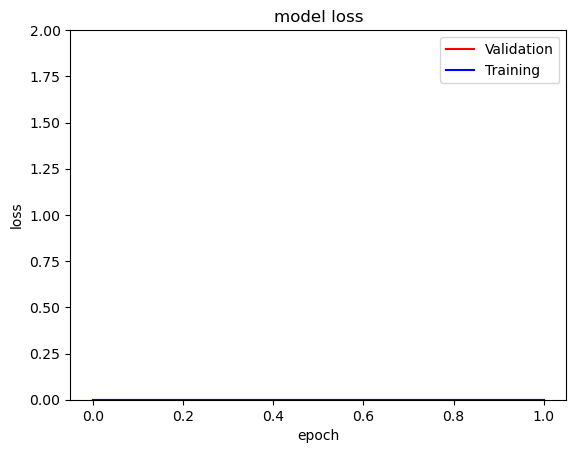

In [110]:
# Plot model evolution
model_evolution_loss(history)

In [111]:
# print metrics
test_set_evalution(model, X_train, X_valid, y_train, y_valid,X_train_test,y_train_test)
model.evaluate(X_train_test,y_train_test)

862/862 [==============================] - 3s 3ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Train set evaluation: [0.0, 1.0]
216/216 [==============================] - 1s 3ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Valid set evaluation: [0.0, 1.0]
270/270 [==============================] - 1s 3ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Test set evaluation: [0.0, 1.0]
270/270 [==============================] - 1s 3ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000


[0.0, 1.0]

## Now do prediction

In [117]:
y_test_pred = model.predict(X_test) 

415/415 [==============================] - 1s 2ms/step


In [118]:
y_test_pred[y_test_pred < 0.5] = 0
y_test_pred[y_test_pred > 0.5] = 1

In [119]:
y_test_pred.sum()

4.0

In [29]:
index_values = np.linspace(0,n-1,n)
df_pred = pd.DataFrame(data = y_test_pred)
df_pred.columns=["Litres"]
df_pred.index.name = 'index'

In [30]:
df_pred.to_csv(r"C:\Users\feyzi\OneDrive - Imperial College London\Programming\ShellDatathonNew\ShellDatathon\SubmissionAttempts\MyTestSubmission.csv")

Plot the weekly liter sum to see estimate

In [31]:
df_test.Litres = y_test_pred

In [32]:
df = pd.concat([df_train_og,df_test])

C:\Users\feyzi\AppData\Local\Temp\ipykernel_13204\1437299923.py:7: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df1 = df1.groupby(by=["WeekStarting"],axis=0).sum()
C:\Users\feyzi\AppData\Local\Temp\ipykernel_13204\1437299923.py:19: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df2 = df2.groupby(by=["WeekStarting"],axis=0).sum()


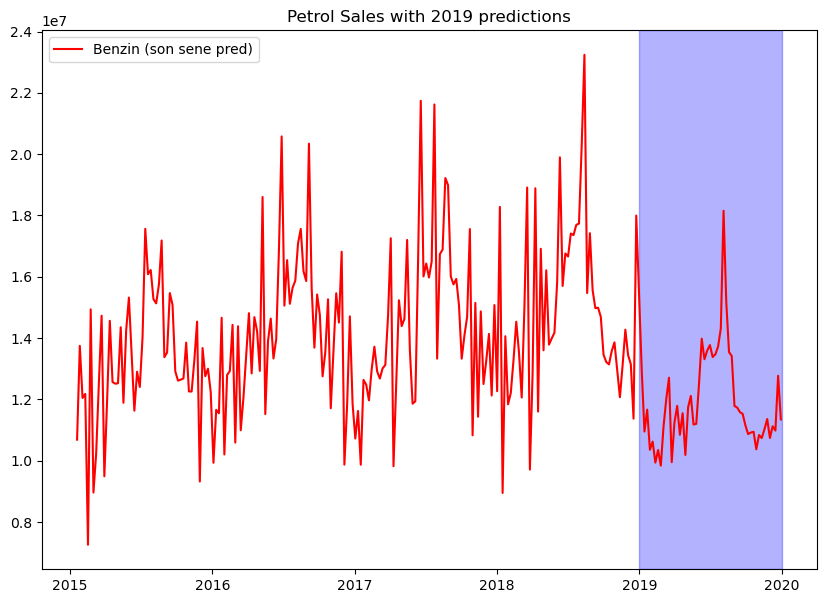

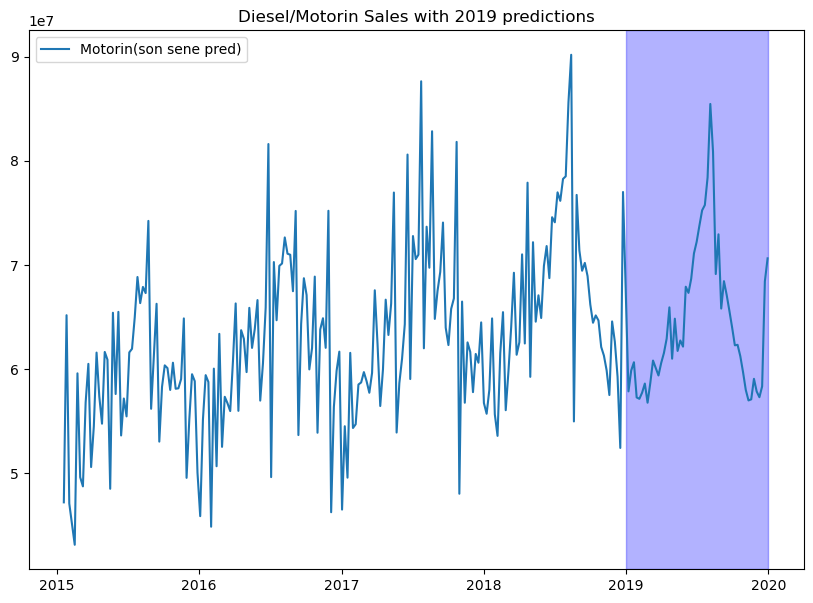

In [33]:
#Benzin


fig, ax = plt.subplots()
fig.set_size_inches(10, 7, forward=True)
df1 = df[df["Benzin"] == 1]
df1 = df1.groupby(by=["WeekStarting"],axis=0).sum()
df1.reset_index(inplace=True)
benzin_sales = df1.Litres
dates = df1["WeekStarting"]
plt.plot(dates,benzin_sales,color='r',label="Benzin (son sene pred)")
ax.set_title("Petrol Sales with 2019 predictions")
ax.legend()
ax.axvspan("2019-01-01", "2020-01-01", color="blue", alpha=0.3)

fig, ax = plt.subplots()
fig.set_size_inches(10, 7, forward=True)
df2 = df[df["Motorin"] == 1]
df2 = df2.groupby(by=["WeekStarting"],axis=0).sum()
df2.reset_index(inplace=True)
motorin_sales = df2.Litres
dates = df2["WeekStarting"]
plt.plot(dates,motorin_sales,label="Motorin(son sene pred)")
ax.set_title("Diesel/Motorin Sales with 2019 predictions")
ax.legend()

# highlight a time range
ax.axvspan("2019-01-01", "2020-01-01", color="blue", alpha=0.3)

#plt.plot(dates,motorin_sales/4.2)